In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import ConvexHull

In [2]:
_ranges = {
    'active_153': [1, 147710, 150190], # active ultra high
    'active_1368': [2, 106600, 111120], # active high
    'active_1702': [3, 43540, 50620], # active middle
    'active_1910': [4, 159470, 165110], # active low
    'represses_448': [11, 48170, 57340], # represses ultra high
    'represses_2060': [5, 175460, 179500], # represses high
    'represses_665': [13, 21610, 23890], # represses middle
    'represses_1284': [2, 20650, 27690], # represses low
}

In [3]:
# enhanced loop
HeLa_ATAC_H3K27ac_H3K4me3_2_100_all_enhanced_sig = np.load(
    '/home/lmh/work/repos/MINE/analyse/fig3/tss/temp/HeLa_ATAC_H3K27ac_H3K4me3_2_100_all_enhanced_sig.npy',
    allow_pickle=True
).item()
HeLa_H3K9me3_H3K27me3_2_100_all_enhanced_sig = np.load(
    '/home/lmh/work/repos/MINE/analyse/fig3/represses/tss/temp/HeLa_H3K9me3_H3K27me3_2_100_all_enhanced_sig.npy',
    allow_pickle=True
).item()

# seq file path
auxiliary_files_path = '/data1/lmh_data/MINE/source'
CTCF_path = os.path.join(auxiliary_files_path, 'HeLa', 'CTCF_peaks.bed')

Hex_CTCF_path = os.path.join(auxiliary_files_path, 'GSE138543', 'GSE138543_ChIPseq_CTCF_peaks.Hex5.bed')

In [4]:
def get_score(sigs, _chr, _start, _end):
    length = int((_end - _start) / 10 + 1)
    scores = np.zeros(length)
    for loop in sigs[_chr]:
        for anchor in loop:
            if anchor >= _start and anchor < _end + 10:
                scores[int((anchor-_start)/10)] += 1
    return scores

def get_seq_score(chip_seq_path, _chr, _start, _end):
    length = int((_end - _start) / 10 + 1)
    scores = np.zeros(length)
    with open(chip_seq_path)as f:
        for line in f:
            datas = line.strip().split()
            left, right = int(int(datas[1])/1000), int(int(datas[2])/1000)
            if left >= _start and right < _end + 10:
                scores[int((left-_start)/10)] += 1
    return scores

In [5]:
active_PASTIS_out_path = '/data1/lmh_data/MINE/GM12878_ATAC_H3K27ac_H3K4me3/analyse/HeLa_ATAC_H3K27ac_H3K4me3/experiment/SDOC/result/HeLa/PASTIS_out'
represses_PASTIS_out_path = '/data1/lmh_data/MINE/GM12878_H3K9me3_H3K27me3/analyse/HeLa_H3K9me3_H3K27me3/experiment/SDOC/result/HeLa/PASTIS_out'
Hex_PASTIS_out_path = '/data1/lmh_data/MINE/GM12878_ATAC_H3K27ac_H3K4me3/analyse/HeLa_ATAC_H3K27ac_H3K4me3/experiment/SDOC_GSE138543_Hex5/result/HeLa/PASTIS_out'

def read_PASTIS_out(file_path):
    _p = []
    with open(file_path, "r") as f:
        datas = f.readlines()
        for data in datas:
            _datas = data.split()
            _data = [np.nan if d == 'nan' else float(d) for d in _datas]
            _p.append(_data)
    return _p

points = dict()
for key in _ranges.keys():
    _range = _ranges[key]
    file_name = 'PM2.chr{}_{}000_{}000'.format(_range[0], _range[1], _range[2])

    PASTIS_out_path = active_PASTIS_out_path if key[:6] == 'active' else represses_PASTIS_out_path
    points[key] = read_PASTIS_out(os.path.join(PASTIS_out_path, file_name))
    points['Hex_{}'.format(key)] = read_PASTIS_out(os.path.join(Hex_PASTIS_out_path, file_name))


In [6]:
def show(points, scores, title):
    very_large = 24; large = 22; med = 16; small = 12
    params = {'axes.titlesize': very_large,
              'legend.fontsize': med,
              'figure.figsize': (10, 10),
              'axes.labelsize': large,
              'axes.titlesize': large,
              'xtick.labelsize': large,
              'ytick.labelsize': large,
              'figure.titlesize': very_large,
              'lines.linewidth': 2}
    plt.rcParams.update(params)
    
    font = {'family': 'sans-serif', 'sans-serif': 'Arial'}
    plt.rc('font', **font)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    cm = plt.get_cmap("Reds")
    col = [cm(float(i)/max(scores)) for i in scores]

    ax.plot(points[:, 0], points[:, 1], points[:, 2], '-')
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=col)
    ax.set_title(title)

    plt.savefig('figure_file/{}.pdf'.format(title))
    plt.show()

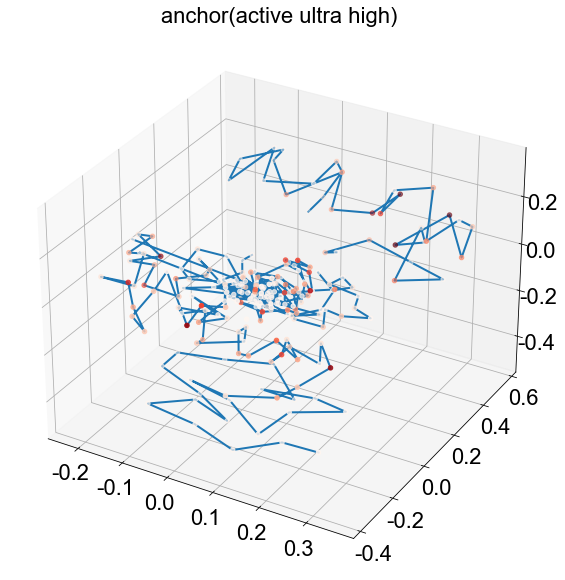

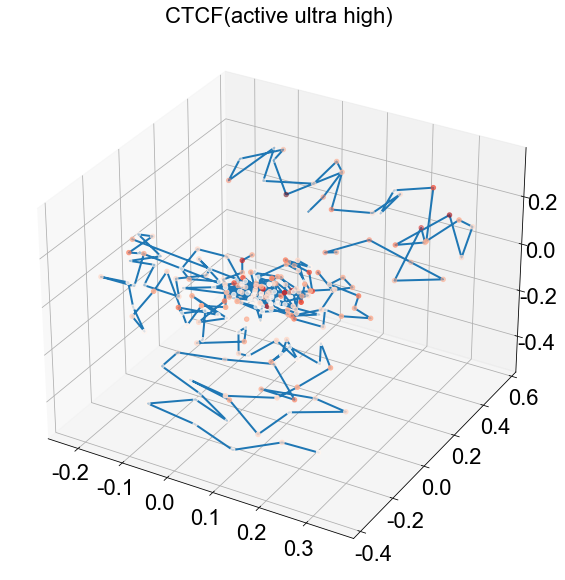

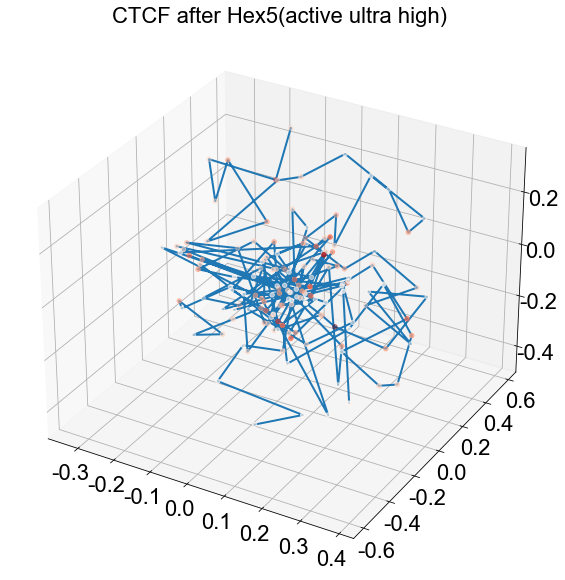

In [7]:
_range, _points = _ranges['active_153'], np.array(points['active_153'])
scores = get_score(HeLa_ATAC_H3K27ac_H3K4me3_2_100_all_enhanced_sig, _range[0], _range[1], _range[2])
show(_points, scores, 'anchor(active ultra high)')

_range, _points = _ranges['active_153'], np.array(points['active_153'])
scores = get_seq_score(CTCF_path, _range[0], _range[1], _range[2])
show(_points, scores, 'CTCF(active ultra high)')
_range, _points = _ranges['active_153'], np.array(points['Hex_active_153'])
scores = get_seq_score(Hex_CTCF_path, _range[0], _range[1], _range[2])
show(_points, scores, 'CTCF after Hex5(active ultra high)')

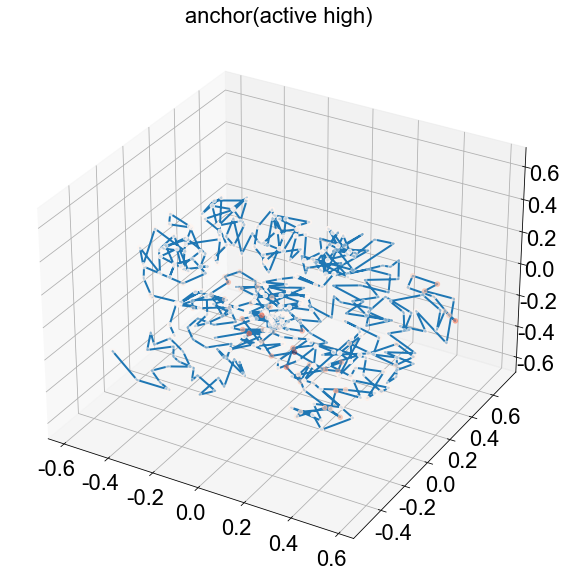

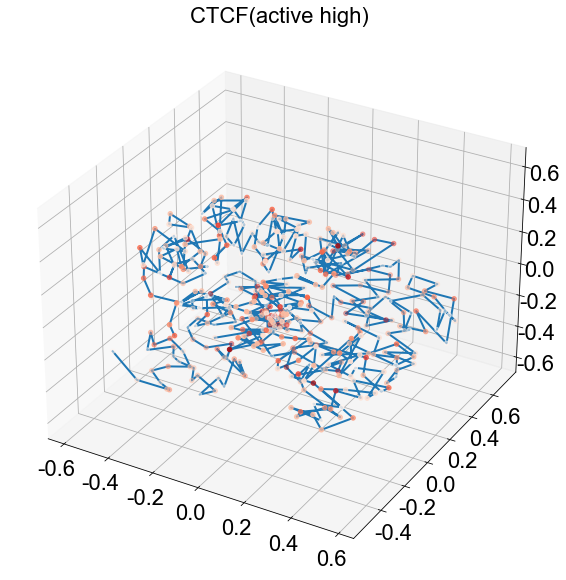

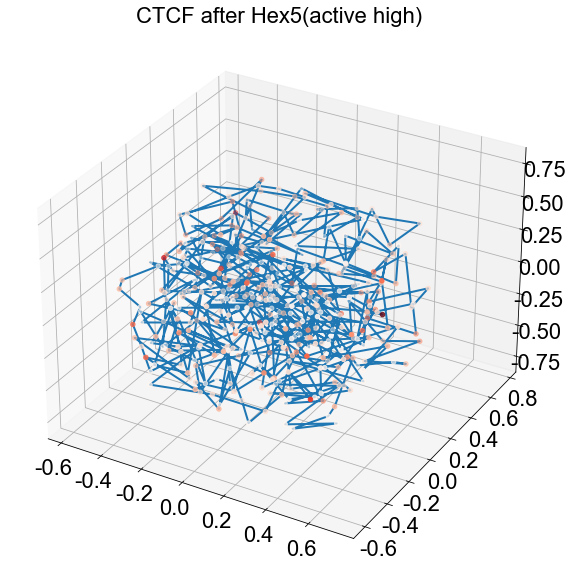

In [8]:
_range, _points = _ranges['active_1368'], np.array(points['active_1368'])
scores = get_score(HeLa_ATAC_H3K27ac_H3K4me3_2_100_all_enhanced_sig, _range[0], _range[1], _range[2])
show(_points, scores, 'anchor(active high)')

_range, _points = _ranges['active_1368'], np.array(points['active_1368'])
scores = get_seq_score(CTCF_path, _range[0], _range[1], _range[2])
show(_points, scores, 'CTCF(active high)')
_range, _points = _ranges['active_1368'], np.array(points['Hex_active_1368'])
scores = get_seq_score(Hex_CTCF_path, _range[0], _range[1], _range[2])
show(_points, scores, 'CTCF after Hex5(active high)')

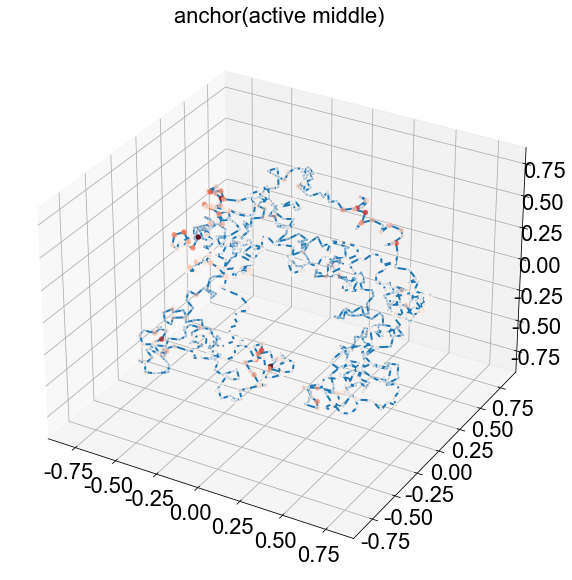

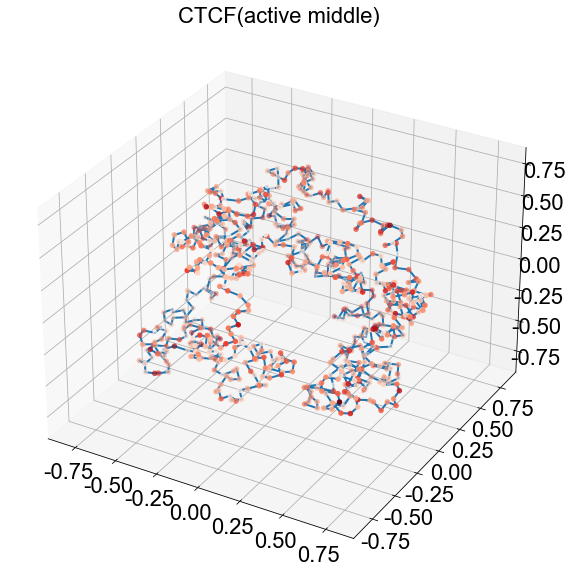

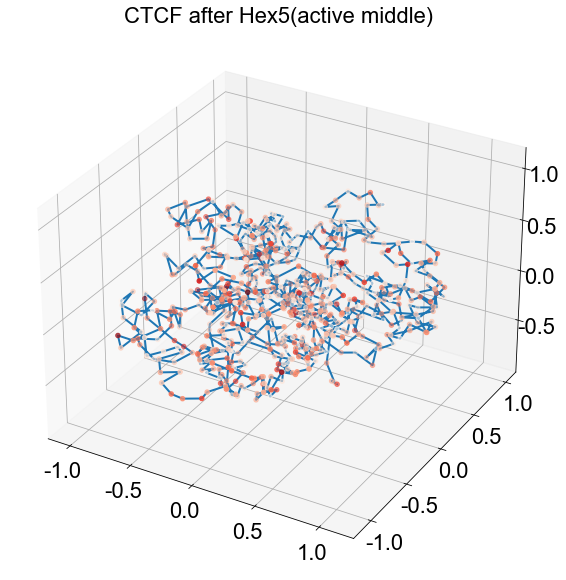

In [9]:
_range, _points = _ranges['active_1702'], np.array(points['active_1702'])
scores = get_score(HeLa_ATAC_H3K27ac_H3K4me3_2_100_all_enhanced_sig, _range[0], _range[1], _range[2])
show(_points, scores, 'anchor(active middle)')

_range, _points = _ranges['active_1702'], np.array(points['active_1702'])
scores = get_seq_score(CTCF_path, _range[0], _range[1], _range[2])
show(_points, scores, 'CTCF(active middle)')
_range, _points = _ranges['active_1702'], np.array(points['Hex_active_1702'])
scores = get_seq_score(Hex_CTCF_path, _range[0], _range[1], _range[2])
show(_points, scores, 'CTCF after Hex5(active middle)')

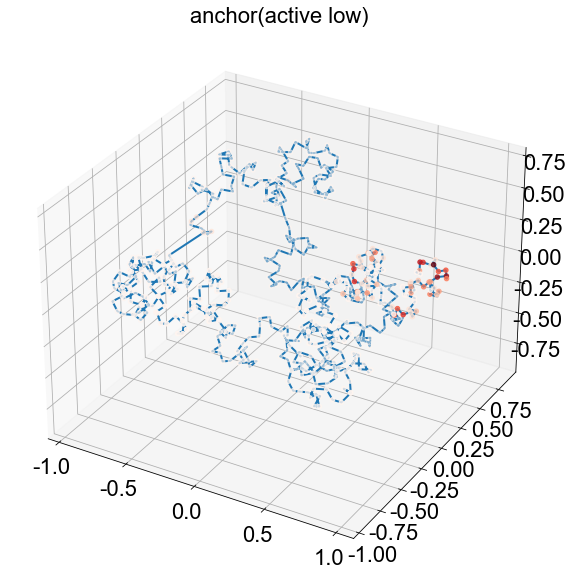

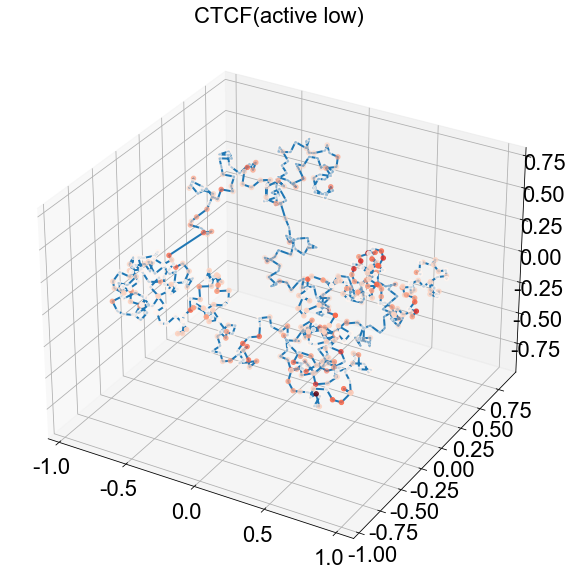

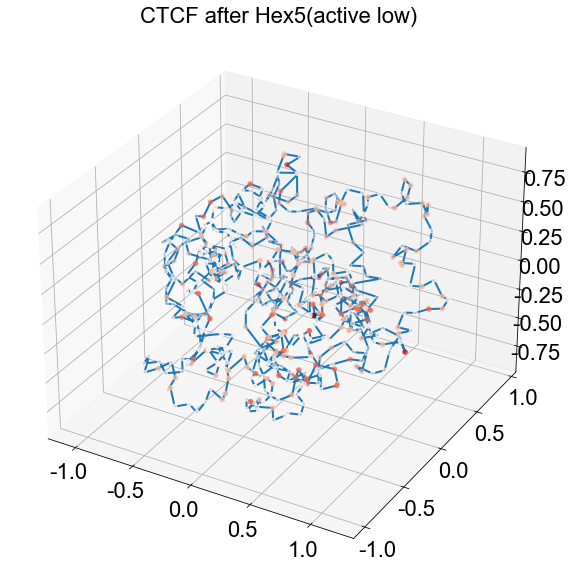

In [10]:
_range, _points = _ranges['active_1910'], np.array(points['active_1910'])
scores = get_score(HeLa_ATAC_H3K27ac_H3K4me3_2_100_all_enhanced_sig, _range[0], _range[1], _range[2])
show(_points, scores, 'anchor(active low)')

_range, _points = _ranges['active_1910'], np.array(points['active_1910'])
scores = get_seq_score(CTCF_path, _range[0], _range[1], _range[2])
show(_points, scores, 'CTCF(active low)')
_range, _points = _ranges['active_1910'], np.array(points['Hex_active_1910'])
scores = get_seq_score(Hex_CTCF_path, _range[0], _range[1], _range[2])
show(_points, scores, 'CTCF after Hex5(active low)')

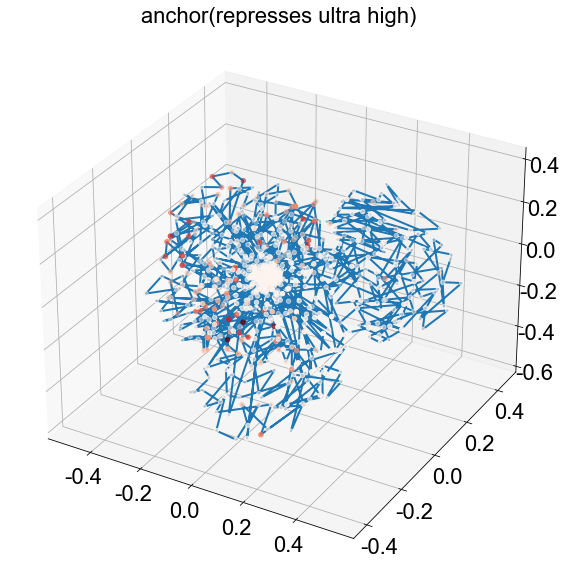

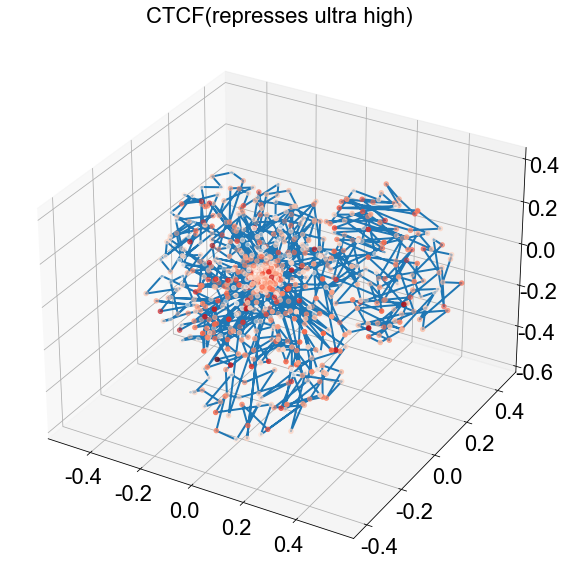

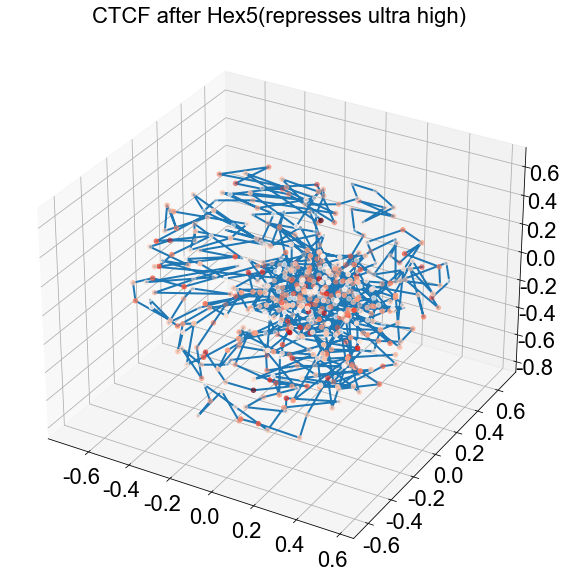

In [11]:
_range, _points = _ranges['represses_448'], np.array(points['represses_448'])
scores = get_score(HeLa_H3K9me3_H3K27me3_2_100_all_enhanced_sig, _range[0], _range[1], _range[2])
show(_points, scores, 'anchor(represses ultra high)')

_range, _points = _ranges['represses_448'], np.array(points['represses_448'])
scores = get_seq_score(CTCF_path, _range[0], _range[1], _range[2])
show(_points, scores, 'CTCF(represses ultra high)')
_range, _points = _ranges['represses_448'], np.array(points['Hex_represses_448'])
scores = get_seq_score(Hex_CTCF_path, _range[0], _range[1], _range[2])
show(_points, scores, 'CTCF after Hex5(represses ultra high)')

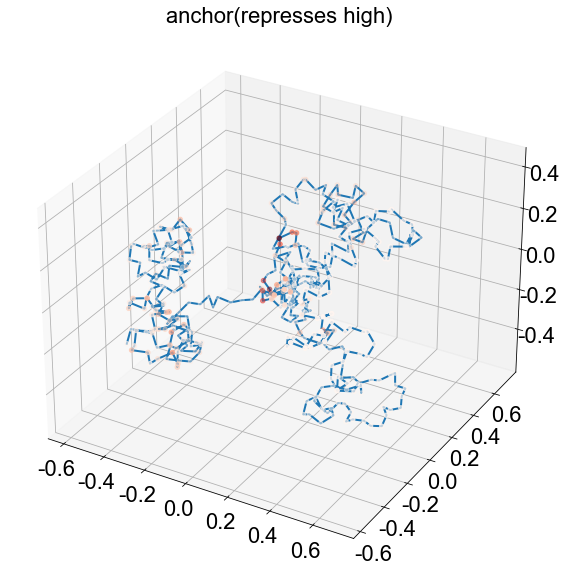

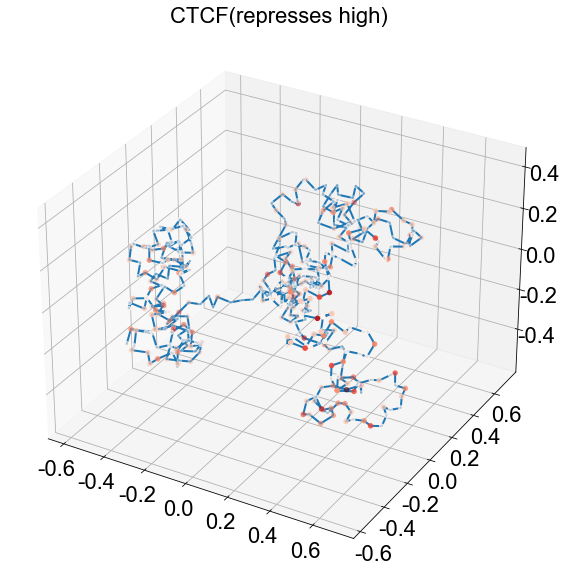

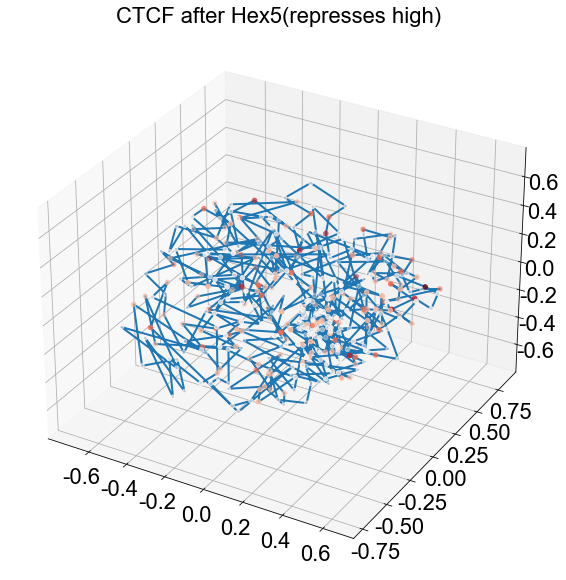

In [12]:
_range, _points = _ranges['represses_2060'], np.array(points['represses_2060'])
scores = get_score(HeLa_H3K9me3_H3K27me3_2_100_all_enhanced_sig, _range[0], _range[1], _range[2])
show(_points, scores, 'anchor(represses high)')

_range, _points = _ranges['represses_2060'], np.array(points['represses_2060'])
scores = get_seq_score(CTCF_path, _range[0], _range[1], _range[2])
show(_points, scores, 'CTCF(represses high)')
_range, _points = _ranges['represses_2060'], np.array(points['Hex_represses_2060'])
scores = get_seq_score(Hex_CTCF_path, _range[0], _range[1], _range[2])
show(_points, scores, 'CTCF after Hex5(represses high)')

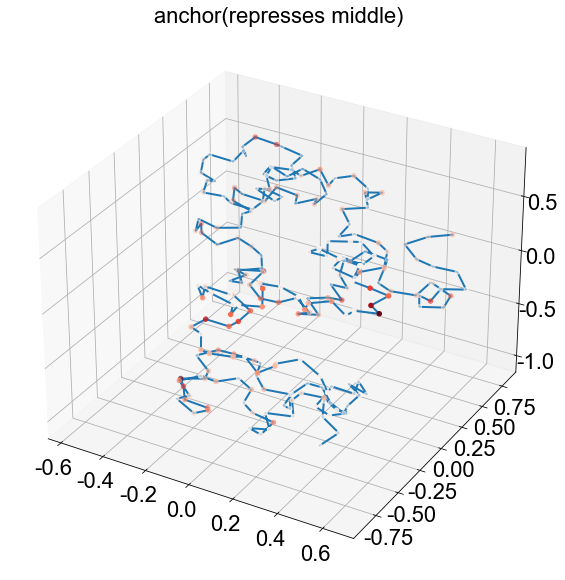

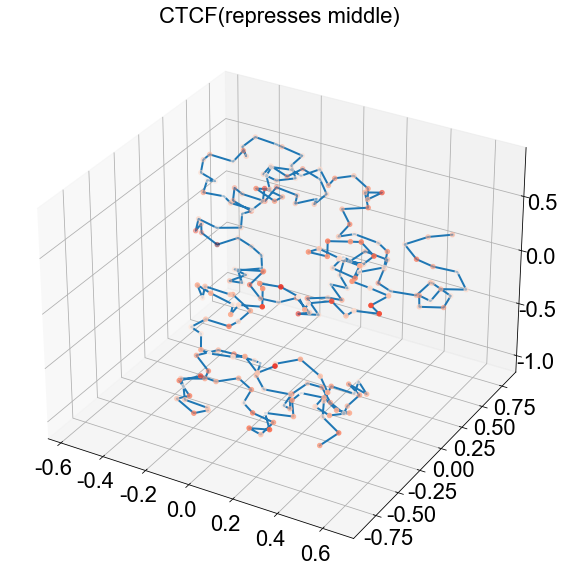

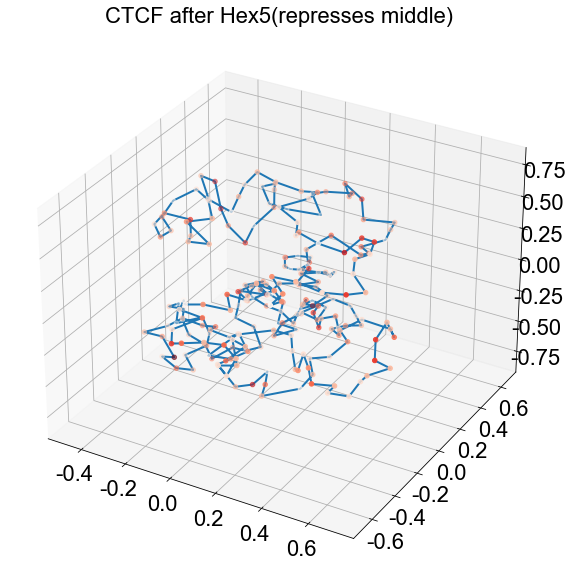

In [13]:
_range, _points = _ranges['represses_665'], np.array(points['represses_665'])
scores = get_score(HeLa_H3K9me3_H3K27me3_2_100_all_enhanced_sig, _range[0], _range[1], _range[2])
show(_points, scores, 'anchor(represses middle)')

_range, _points = _ranges['represses_665'], np.array(points['represses_665'])
scores = get_seq_score(CTCF_path, _range[0], _range[1], _range[2])
show(_points, scores, 'CTCF(represses middle)')
_range, _points = _ranges['represses_665'], np.array(points['Hex_represses_665'])
scores = get_seq_score(Hex_CTCF_path, _range[0], _range[1], _range[2])
show(_points, scores, 'CTCF after Hex5(represses middle)')

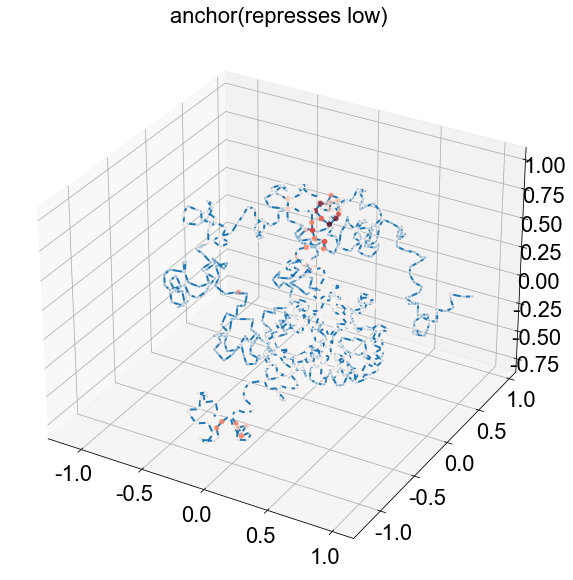

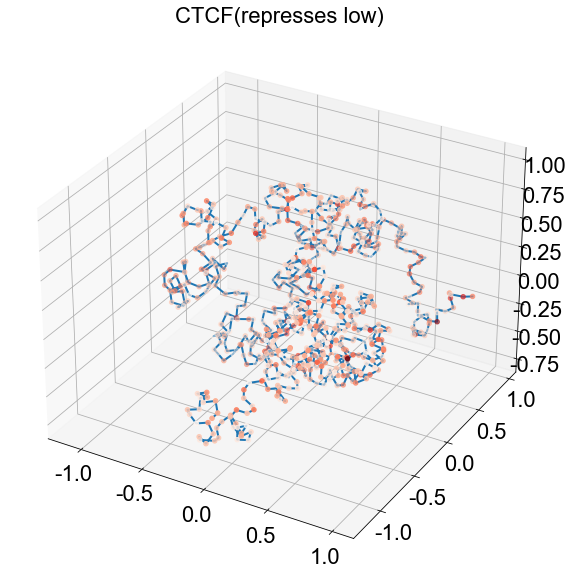

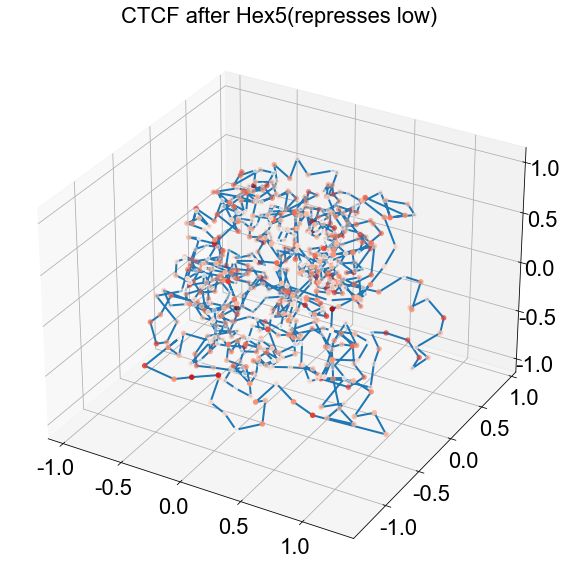

In [14]:
_range, _points = _ranges['represses_1284'], np.array(points['represses_1284'])
scores = get_score(HeLa_H3K9me3_H3K27me3_2_100_all_enhanced_sig, _range[0], _range[1], _range[2])
show(_points, scores, 'anchor(represses low)')

_range, _points = _ranges['represses_1284'], np.array(points['represses_1284'])
scores = get_seq_score(CTCF_path, _range[0], _range[1], _range[2])
show(_points, scores, 'CTCF(represses low)')
_range, _points = _ranges['represses_1284'], np.array(points['Hex_represses_1284'])
scores = get_seq_score(Hex_CTCF_path, _range[0], _range[1], _range[2])
show(_points, scores, 'CTCF after Hex5(represses low)')